In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.metrics import accuracy_score, precision_score, f1_score,confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
import os
for dirname, _, filenames in os.walk('/content/adult.csv'):
    for filename in filenames:
       print(os.path.join(dirname, filename))

In [4]:
file = ('/content/adult.csv')
df = pd.read_csv(file)

In [5]:
print(df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [7]:
for i in df.columns:
        t = df[i].value_counts()
        index = list(t.index)
        print ("Count of ? in", i)
        for i in index:
            temp = 0
            if i == '?':
                    print (t['?'])
                    temp = 1
                    break
            if temp == 0:
                   print ("0")

Streaming output truncated to the last 5000 lines.
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

In [8]:
df=df.loc[(df['workclass'] != '?') & (df['native.country'] != '?')]
print(df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
1   82   Private  132870       HS-grad              9        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   
5   34   Private  216864       HS-grad              9       Divorced   
6   38   Private  150601          10th              6      Separated   

          occupation   relationship   race     sex  capital.gain  \
1    Exec-managerial  Not-in-family  White  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   
5      Other-service      Unmarried  White  Female             0   
6       Adm-clerical      Unmarried  White    Male             0   

   capital.loss  hours.per.week native.country income  
1          4356              18  United-States  <=50K  
3          3900              40  United-States

In [9]:
df["income"] = [1 if i=='>50K' else 0 for i in df["income"]]
print(df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
1   82   Private  132870       HS-grad              9        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   
5   34   Private  216864       HS-grad              9       Divorced   
6   38   Private  150601          10th              6      Separated   

          occupation   relationship   race     sex  capital.gain  \
1    Exec-managerial  Not-in-family  White  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   
5      Other-service      Unmarried  White  Female             0   
6       Adm-clerical      Unmarried  White    Male             0   

   capital.loss  hours.per.week native.country  income  
1          4356              18  United-States       0  
3          3900              40  United-Stat

In [10]:
df_more=df.loc[df['income'] == 1]
print(df_more.head())

    age         workclass  fnlwgt    education  education.num marital.status  \
7    74         State-gov   88638    Doctorate             16  Never-married   
10   45           Private  172274    Doctorate             16       Divorced   
11   38  Self-emp-not-inc  164526  Prof-school             15  Never-married   
12   52           Private  129177    Bachelors             13        Widowed   
13   32           Private  136204      Masters             14      Separated   

         occupation    relationship   race     sex  capital.gain  \
7    Prof-specialty  Other-relative  White  Female             0   
10   Prof-specialty       Unmarried  Black  Female             0   
11   Prof-specialty   Not-in-family  White    Male             0   
12    Other-service   Not-in-family  White  Female             0   
13  Exec-managerial   Not-in-family  White    Male             0   

    capital.loss  hours.per.week native.country  income  
7           3683              20  United-States     

In [11]:
workclass_types = df_more['workclass'].value_counts()
labels = list(workclass_types.index)
aggregate = list(workclass_types)
print(workclass_types)
print(aggregate)
print(labels)

Private             4876
Self-emp-not-inc     714
Local-gov            609
Self-emp-inc         600
Federal-gov          365
State-gov            344
Name: workclass, dtype: int64
[4876, 714, 609, 600, 365, 344]
['Private', 'Self-emp-not-inc', 'Local-gov', 'Self-emp-inc', 'Federal-gov', 'State-gov']


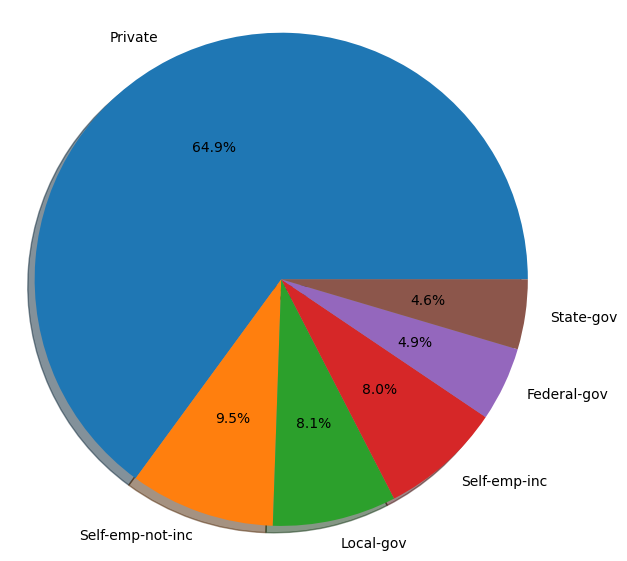

In [12]:
plt.figure(figsize=(7,7))
plt.pie(aggregate, labels=labels, autopct='%1.1f%%', shadow = True)
plt.axis('equal')
plt.show()

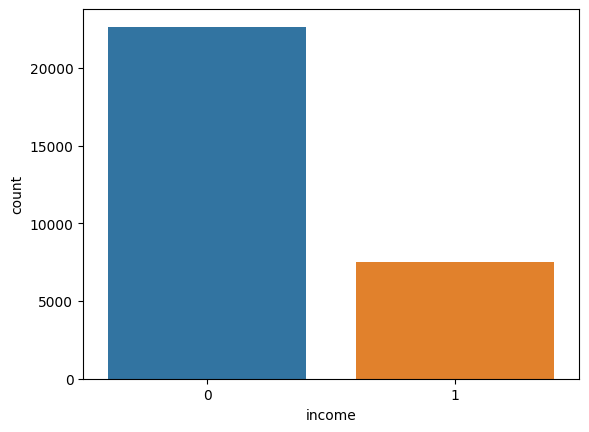

0    22661
1     7508
Name: income, dtype: int64

In [13]:
#Count plot on single categorical variable
sns.countplot(x ='income', data = df)
plt.show()
df['income'].value_counts()

<ipython-input-14-c01c35a847eb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


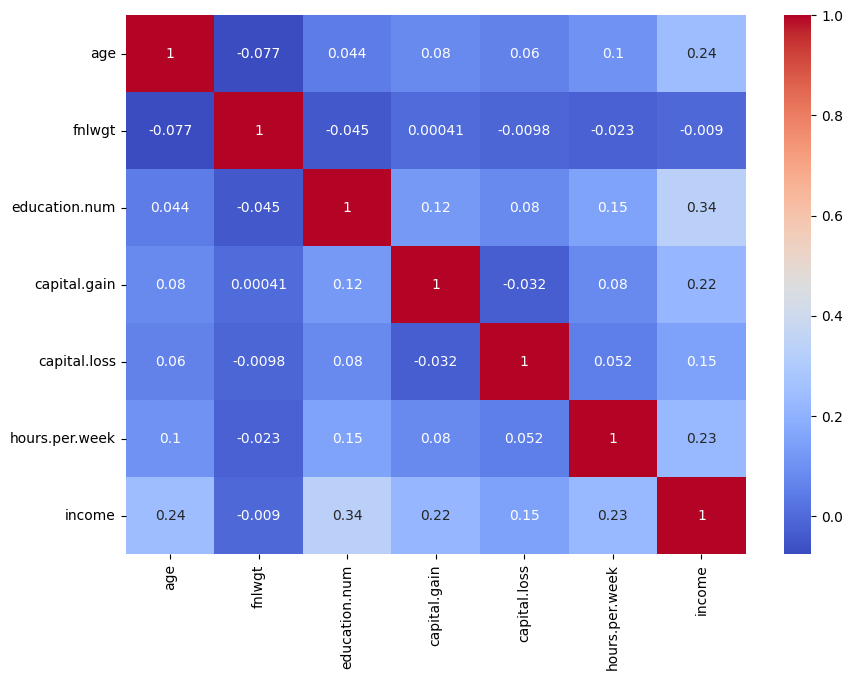

None


<ipython-input-14-c01c35a847eb>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], color="red", bins=100)


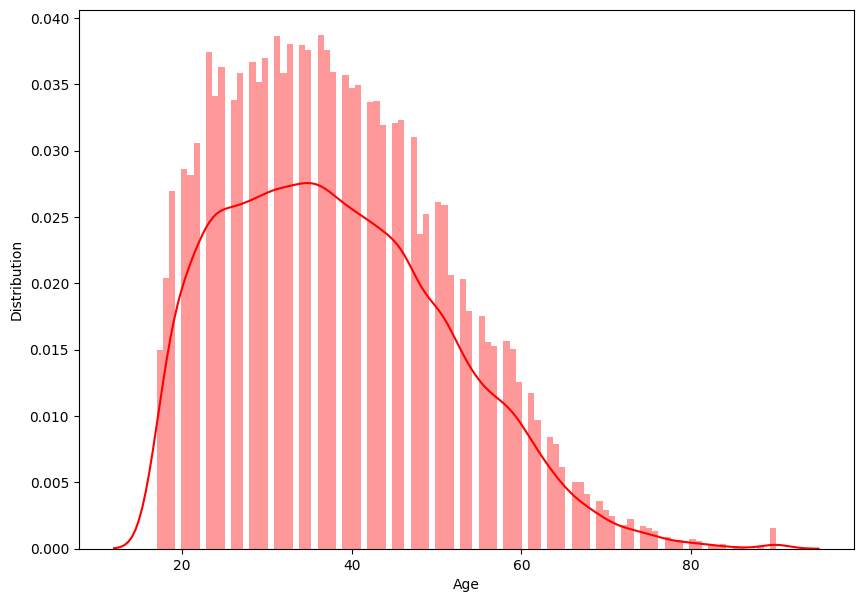

In [14]:
#Plot figsize
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
print(plt.show())
plt.figure(figsize=(10,7))
sns.distplot(df['age'], color="red", bins=100)
plt.ylabel("Distribution", fontsize = 10)
plt.xlabel("Age", fontsize = 10)
plt.show()

<ipython-input-16-e1b6d1f0108f>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


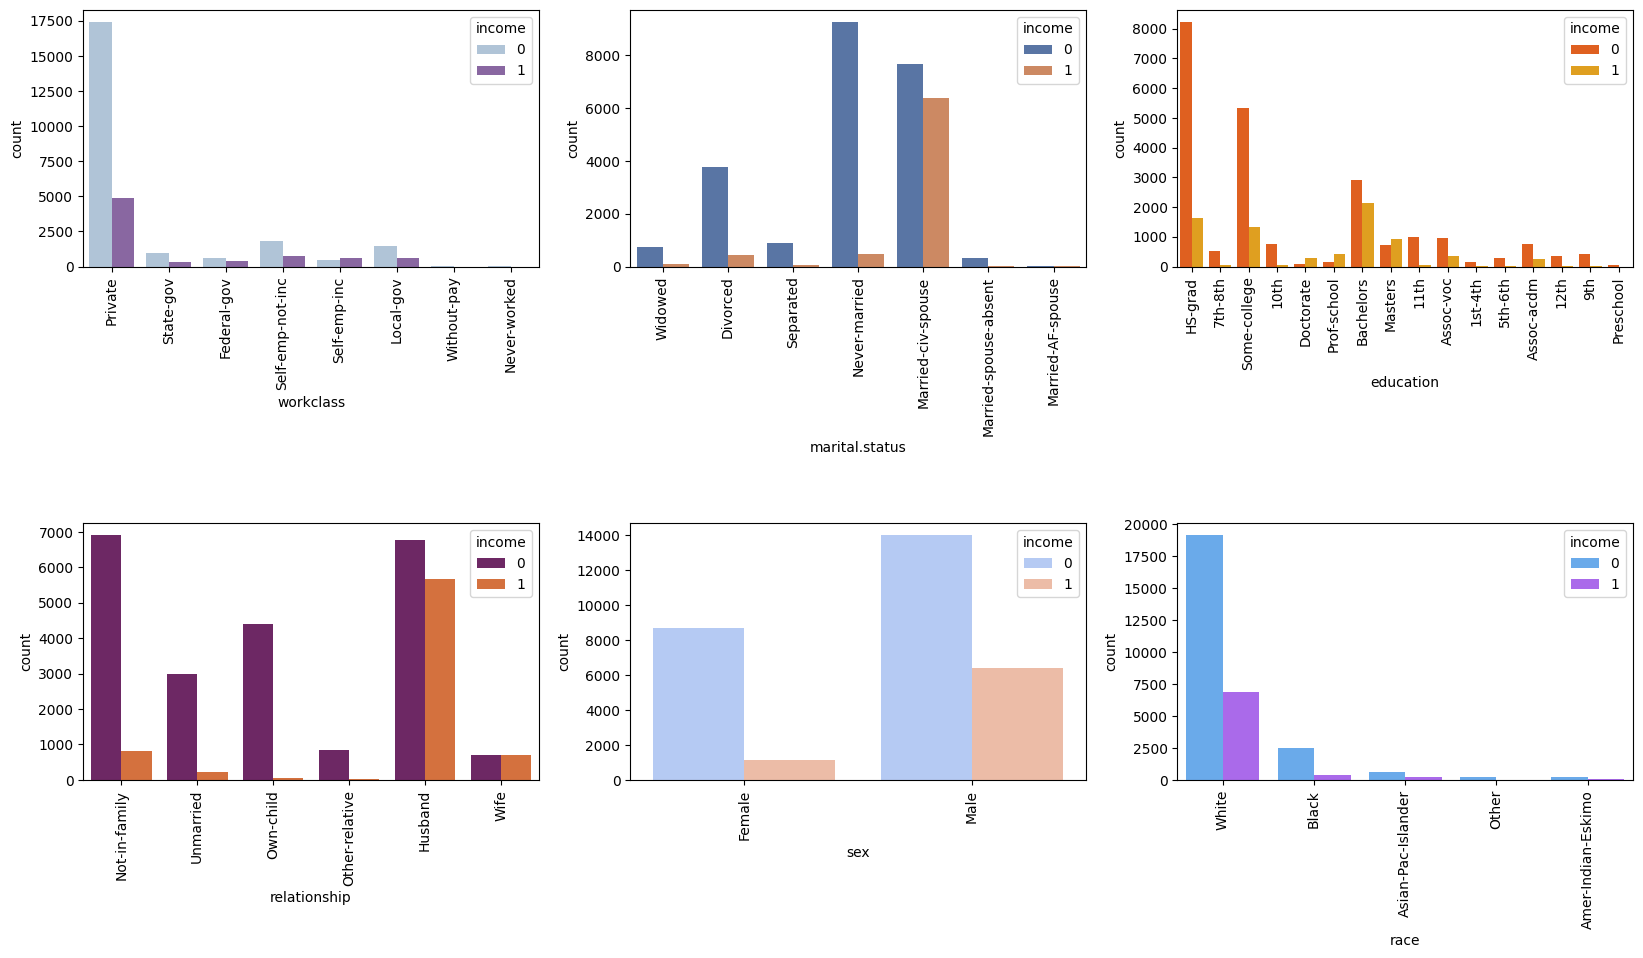

In [16]:
#To find distribution of categorical columns w.r.t income
fig, axes = plt.subplots(figsize=(20, 10))
plt.subplot(231)
sns.countplot(x ='workclass',
hue='income',
data = df,
palette="BuPu")
plt.xticks(rotation=90)
plt.subplot(232)
sns.countplot(x ='marital.status',
hue='income',
data = df,
palette="deep")
plt.xticks(rotation=90)
plt.subplot(233)
sns.countplot(x ='education',
hue='income',
data = df,
palette = "autumn")
plt.xticks(rotation=90)
plt.subplot(234)
sns.countplot(x ='relationship',
hue='income',
data = df,
palette = "inferno")
plt.xticks(rotation=90)
plt.subplot(235)
sns.countplot(x ='sex',
hue='income',
data = df,
palette = "coolwarm")
plt.xticks(rotation=90)
plt.subplot(236)
sns.countplot(x ='race',
hue='income',
data = df,
palette = "cool")
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=1)
plt.show()


In [17]:
df1 = df.copy()
categorical_features = list(df1.select_dtypes(include=['object']).columns)
print(categorical_features)
df1

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feat in categorical_features:
        df1[feat] = le.fit_transform(df1[feat].astype(str))
        df1

In [21]:
X = df1.drop(columns = ['income'])
y = df1['income'].values
# Splitting the data set into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 0)
print ("Train set size: ", X_train.shape)
print ("Test set size: ", X_test.shape)

from sklearn.ensemble import AdaBoostClassifier
# Train Adaboost Classifer
abc = AdaBoostClassifier(n_estimators = 300, learning_rate=1)
abc_model = abc.fit(X_train, y_train)
#Prediction
y_pred_abc = abc_model.predict(X_test)

Train set size:  (21118, 14)
Test set size:  (9051, 14)


In [22]:
print("Accuracy: ", accuracy_score(y_test, y_pred_abc))
print("F1 score :",f1_score(y_test, y_pred_abc, average='binary'))
print("Precision : ", precision_score(y_test, y_pred_abc))

Accuracy:  0.8637719588995691
F1 score : 0.7008007765105557
Precision :  0.7921009325287987


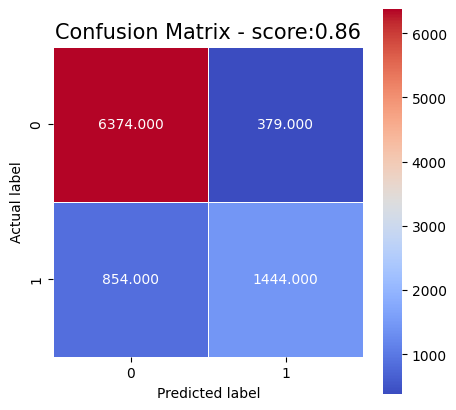

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6753
           1       0.79      0.63      0.70      2298

    accuracy                           0.86      9051
   macro avg       0.84      0.79      0.81      9051
weighted avg       0.86      0.86      0.86      9051



In [24]:
cm = confusion_matrix(y_test, y_pred_abc)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap ="coolwarm");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix - score:' + str(round(accuracy_score(y_test,y_pred_abc), 2)), size = 15);
plt.show()
print(classification_report(y_test, y_pred_abc))

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
#Training the model with gradient boosting
gbc = GradientBoostingClassifier(
learning_rate = 0.1,
n_estimators = 500,
max_depth = 5,
subsample = 0.9,
min_samples_split = 100,
max_features='sqrt',
random_state=10)
gbc.fit(X_train,y_train)
# Predictions
y_pred_gbc = gbc.predict(X_test)
print("Accuracy : ",accuracy_score(y_test, y_pred_gbc))
print("F1 score : ", f1_score(y_test, y_pred_gbc, average = 'binary'))
print("Precision : ", precision_score(y_test, y_pred_gbc))


Accuracy :  0.8689647552756602
F1 score :  0.7218574108818011
Precision :  0.7828077314343845


RMSE for gradient boost:  0.3619879068758235


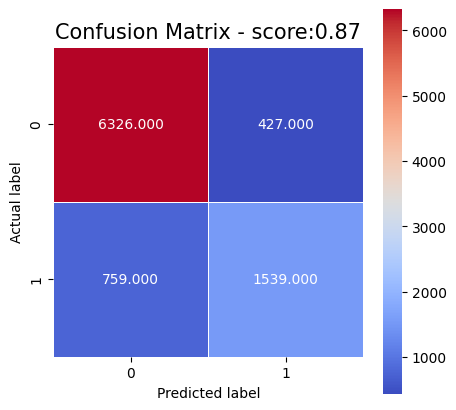

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6753
           1       0.78      0.67      0.72      2298

    accuracy                           0.87      9051
   macro avg       0.84      0.80      0.82      9051
weighted avg       0.86      0.87      0.87      9051



In [26]:
rms = np.sqrt(mean_squared_error(y_test, y_pred_gbc))
print("RMSE for gradient boost: ", rms)

cm = confusion_matrix(y_test, y_pred_gbc)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot = True, fmt=".3f", linewidths = 0.5, square = True, cmap= "coolwarm");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix - score:' + str(round(accuracy_score(y_test,y_pred_gbc),2)), size = 15);
plt.show()
print(classification_report(y_test, y_pred_gbc))

In [27]:
import xgboost as xgb
from xgboost import XGBClassifier
#Training the model with gradient boosting
xgboost = XGBClassifier(learning_rate=0.01,
colsample_bytree = 0.4,
n_estimators=1000,
max_depth=20,
gamma=1)
xgboost_model = xgboost.fit(X_train, y_train)


Accuracy :  0.8655397193680257
F1 score :  0.7090604829070045
Precision :  0.786737400530504
RMSE for xgboost:  0.3666882608319693


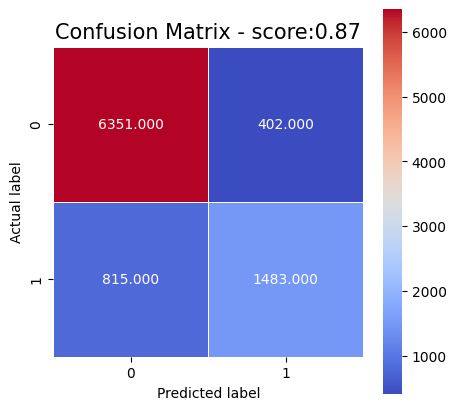

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6753
           1       0.79      0.65      0.71      2298

    accuracy                           0.87      9051
   macro avg       0.84      0.79      0.81      9051
weighted avg       0.86      0.87      0.86      9051



In [28]:
# Predictions
y_pred_xgboost = xgboost_model.predict(X_test)
print("Accuracy : ",accuracy_score(y_test, y_pred_xgboost))
print("F1 score : ", f1_score(y_test, y_pred_xgboost, average = 'binary'))
print("Precision : ", precision_score(y_test, y_pred_xgboost))

rms = np.sqrt(mean_squared_error(y_test, y_pred_xgboost))
print("RMSE for xgboost: ", rms)

cm = confusion_matrix(y_test, y_pred_xgboost)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap ="coolwarm");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix - score:'+str(round(accuracy_score(y_test,y_pred_xgboost),2)), size = 15);
plt.show()
print(classification_report(y_test,y_pred_xgboost))


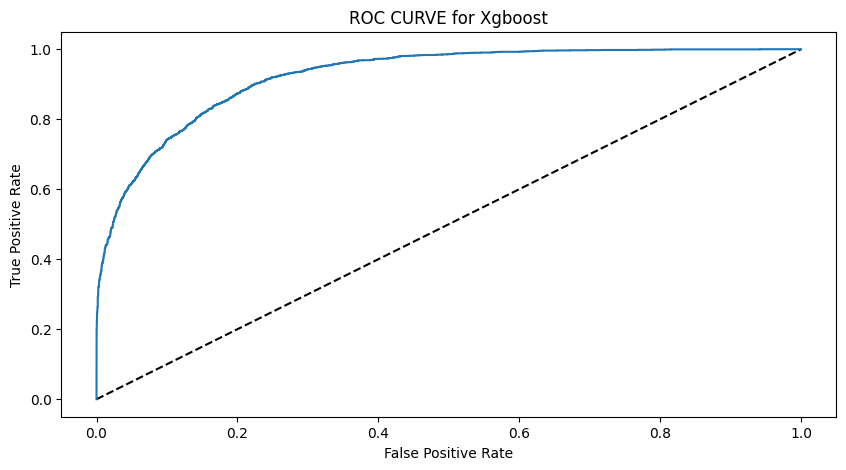

In [29]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, xgboost.predict_proba(X_test)[:,1])
plt.figure(figsize = (10,5))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE for Xgboost')
plt.show()